In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import tensorflow as tf
import torch
from PIL import Image

from ultralytics import YOLO
import os
import shutil

import matplotlib.pyplot as plt

print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  1


In [ ]:
os.getcwd()

In [3]:
with open('./IDD_Detection/train.txt') as f:
    lines = f.readlines()
    
train_imgs_path = []
train_annots_path = []

for line in lines:
    train_imgs_path.append(line.replace("\n",".jpg"))
    
for line in lines:
    train_annots_path.append(line.replace("\n",".xml"))

In [4]:
with open('./IDD_Detection/test.txt') as f:
    lines = f.readlines()
    
test_imgs_path = []

for line in lines:
    test_imgs_path.append(line.replace("\n",".jpg"))

In [5]:
with open('./IDD_Detection/val.txt') as f:
    lines = f.readlines()
    
val_imgs_path = []
val_annots_path = []

for line in lines:
    val_imgs_path.append(line.replace("\n",".jpg"))
    
for line in lines:
    val_annots_path.append(line.replace("\n",".xml"))

In [ ]:
img = './IDD_Detection/JPEGImages/'+train_imgs_path[0]

In [6]:
def plotimage(img):
    img = np.asarray(Image.open(img))
    plt.imshow(img)

In [ ]:
plotimage(img)

In [ ]:
img_path = "./IDD_Detection/JPEGImages/"
img_annot = "./IDD_Detection/Annotations/"

In [ ]:
# for i in range(len(train_imgs_path)):
#     shutil.copy(img_path+train_imgs_path[i], './Dataset/train/')
#     shutil.copy(img_annot+train_annots_path[i], './Dataset/train/')

In [ ]:
# for i in range(len(test_imgs_path)):
#     shutil.copy(img_path+test_imgs_path[i], './Dataset/test/')

In [ ]:
# for i in range(len(val_imgs_path)):
#     shutil.copy(img_path+val_imgs_path[i], './Dataset/val/')
#     shutil.copy(img_annot+val_annots_path[i], './Dataset/val/')

In [2]:
# Load the TensorBoard notebook extension
%load_ext tensorboard

## YOLO Model on coco dataset

In [29]:
model = YOLO('yolov8n.pt')

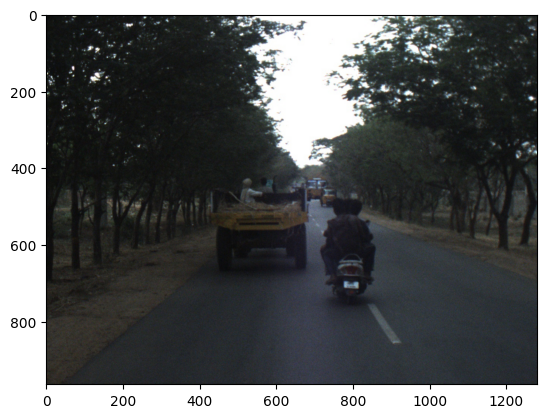

In [12]:
plotimage('./IDD_Detection/JPEGImages/'+test_imgs_path[10])

In [30]:
result = model('./IDD_Detection/JPEGImages/'+test_imgs_path[10])

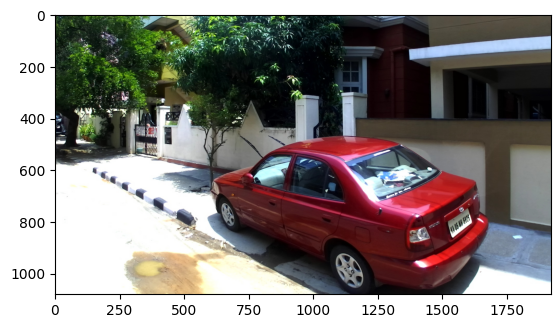

In [9]:
plotimage('./IDD_Detection/JPEGImages/'+test_imgs_path[2461])

In [10]:
results = model('./IDD_Detection/JPEGImages/'+test_imgs_path[2461], save=True)


image 1/1 D:\Work\Pace\Spring 2023\IDD_Detection\JPEGImages\sideRight\BLR-2018-05-14_11-29-33_sideRight\000210_r.jpg: 384x640 1 car, 120.7ms
Speed: 2.0ms preprocess, 120.7ms inference, 7.0ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs\detect\predict3


In [ ]:
model = model.train(data='data.yaml', model='runs/detect/train21/weights/best.pt', pretrained=True, verbose=True, epochs=50, batch=2, cos_lr=True)

In [7]:
m_test = YOLO('./runs/detect/train20/weights/best.pt')

In [8]:
res = m_test('./IDD_Detection/JPEGImages/'+test_imgs_path[2461], save=True)


WARNING  NMS time limit 0.550s exceeded
image 1/1 D:\Work\Pace\Spring 2023\IDD_Detection\JPEGImages\sideRight\BLR-2018-05-14_11-29-33_sideRight\000210_r.jpg: 384x640 3 cars, 68.8ms
Speed: 10.0ms preprocess, 68.8ms inference, 1293.0ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs\detect\predict7


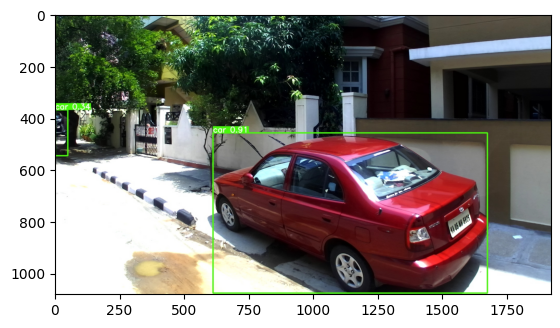

In [11]:
plotimage('runs/detect/predict4/000210_r.jpg')

## YOLO without pretrained weights

In [27]:
model_v1 = YOLO()

In [28]:
model_v1 = model_v1.train(data='data.yaml', verbose=True, epochs=50, batch=2, cos_lr=True, val=True)

New https://pypi.org/project/ultralytics/8.0.87 available  Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.0.81  Python-3.10.9 torch-2.0.0+cu117 CUDA:0 (NVIDIA GeForce GTX 1660 Ti, 6144MiB)
yolo\engine\trainer: task=detect, mode=train, model=yolov8n.pt, data=data.yaml, epochs=50, patience=50, batch=2, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=True, close_mosaic=0, resume=False, amp=True, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks

In [ ]:
!tensorboard --logdir runs\detect\train7